# Task 1 : Text Sentiment Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Objective
    The objective of this task is to perform sentiment analysis on a dataset of text data obtained from
    Kaggle. The goal is to analyze each text and assign a corresponding sentiment label (e.g., positive,
    negative, or neutral). This task will encompass data cleaning, preprocessing, feature engineering, model
    selection, and evaluation.


# Methodology

###  1. Data Collection
###  2. Data Cleaning and Preprocessing
###  3. Exploratory Data Analysis (EDA)
###  4. Feature Engineering
###  5. Model Selection
###  6. Model Training and Evaluation


# Data Collection:

This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset:
- Positive
- Negative
- Neutral
- Irrelevant

The Dataset is downloaded to our drive in csv format from there we will retrieve our data using pandas dataframe.

In [ ]:
## Import all the necessary libraries here

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [ ]:
## Retrive data here using pandas Dataframe

train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rex Technologies ML Intership/Task1 Kaggle Text Sentiment Analysis/twitter_dataset/twitter_training.csv" ,header = None)
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rex Technologies ML Intership/Task1 Kaggle Text Sentiment Analysis/twitter_dataset/twitter_validation.csv" ,header = None)

In [ ]:
## View the Train Data and test data
train_df = train_df.drop(train_df.iloc[:,0:2],axis = 1)
test_df = test_df.drop(test_df.iloc[:,0:2],axis = 1)



In [ ]:
## view the data
text_df = pd.concat((train_df ,test_df) ,axis = 0)
text_df.rename(columns = {2 : "sentiment" ,3: "text"} ,inplace = True)
text_df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')

 # Data Cleaning and Preprocessing

- Check for missing value
- Remove duplicates text
- Casing
- Remove Noise(http link ,@ ,# hashtage etc)
-



In [ ]:
## check for nan and missing values
print(text_df.isna().sum())

# drops Nan Values from DataFrame
text_df.dropna(inplace=True)

print("\n" ,"After droped ")
print(text_df.isna().sum())

sentiment      0
text         686
dtype: int64

 After droped 
sentiment    0
text         0
dtype: int64


In [ ]:
## check for duplicates
print("Duplicated Rows",text_df.duplicated().sum())


## Drop duplicates values
text_df.drop_duplicates(inplace = True)

print("Duplicated Rows after",text_df.duplicated().sum())

Duplicated Rows 4744
Duplicated Rows after 0


In [ ]:
def textProcessing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s\n]','',text)

    lemmatizer = WordNetLemmatizer()
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in words]  # Lemmatize verbs
    lemmatized_text = " ".join(lemmatized_words)
    return lemmatized_text




In [ ]:
text_df["text"] = text_df['text'].apply(textProcessing)

In [ ]:
text_df['text']

0        im get on borderlands and i will murder you all
1        i be come to the border and i will kill you all
2          im get on borderlands and i will kill you all
3       im come on borderlands and i will murder you all
4      im get on borderlands 2 and i will murder you ...
                             ...                        
988    suikoden 2 1 alex kidd in miracle world person...
989    thank you to match fund home depot rw payment ...
991    late night stream with the boys come watch som...
995    toronto be the arts and culture capital of can...
996    this be actually a good move tot bring more vi...
Name: text, Length: 70252, dtype: object

In [ ]:
text_df["sentiment"].value_counts()

Negative      21329
Positive      19271
Neutral       17281
Irrelevant    12371
Name: sentiment, dtype: int64

# Exploratory Data Analysis (EDA)
- Will visualize data(unbalance data ,wordcloud etc)
- will use different graph to visualize

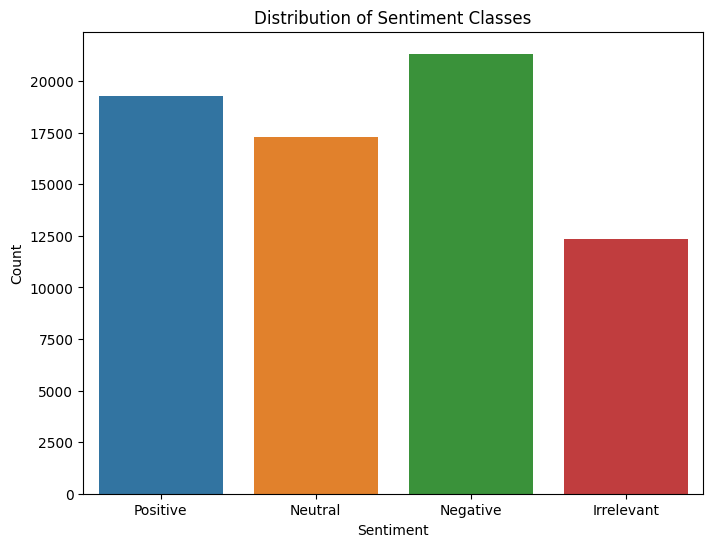

In [ ]:
## Visualize the sentiment Distribution

# Visualizing the Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=text_df, x='sentiment')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#### As we can view from the figure above graph that the is label is well balananced


## Now view WorkCloud for each sentiment

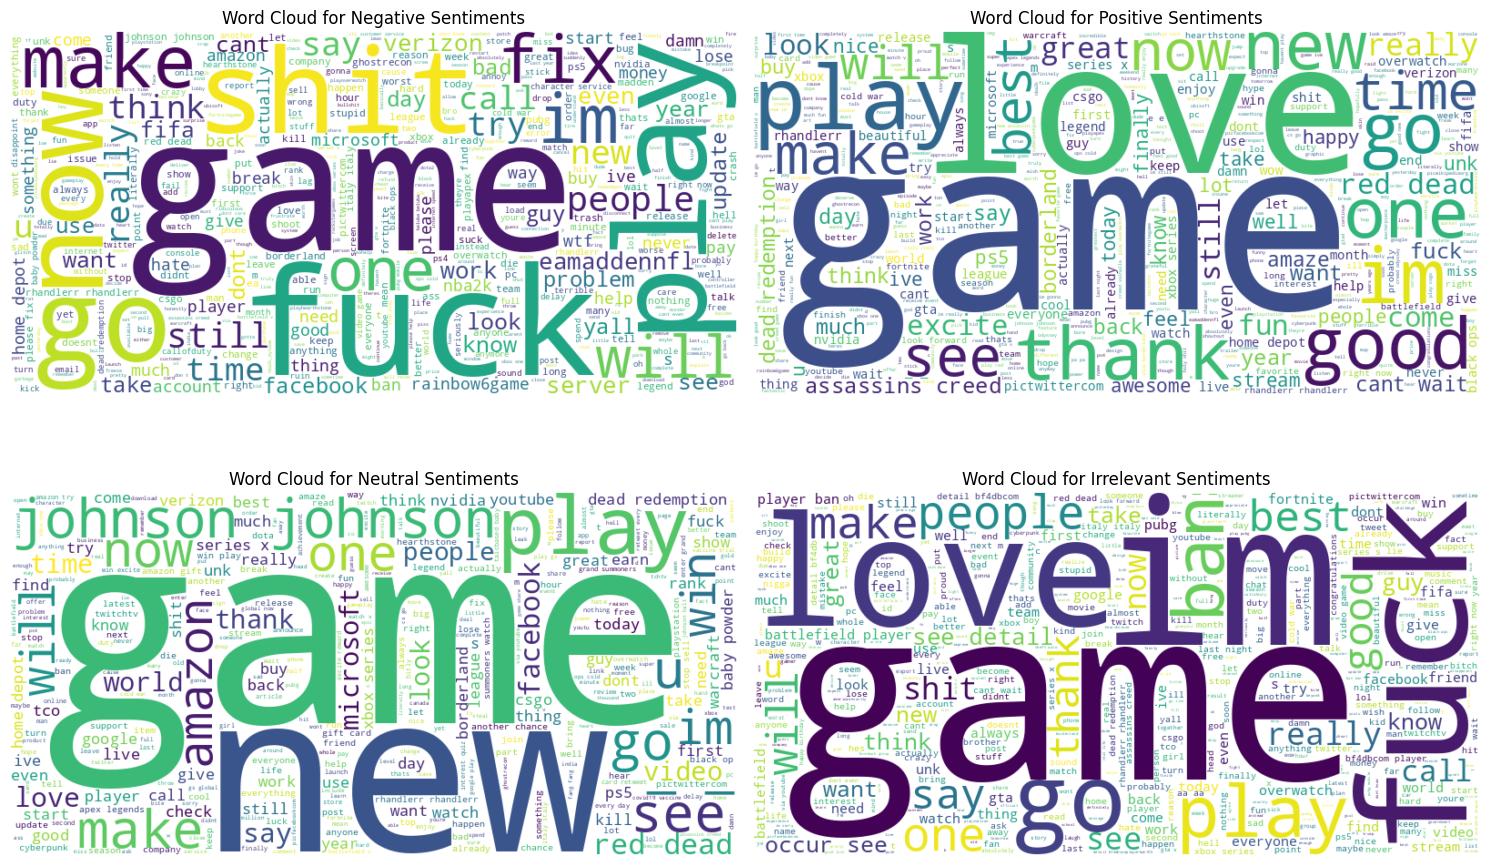

In [ ]:
## Check the Word cloud for

sentiments = ["Negative", "Positive", "Neutral", "Irrelevant"]

plt.figure(figsize=(15, 10))
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(2, 2, i)
    text_subset = " ".join(list(text_df[text_df["sentiment"] == sentiment]['text']))  # Corrected line
    wordcloud = WordCloud(max_words=500,width=800, height=400, background_color='white').generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiments')
    plt.axis('off')

plt.tight_layout()
plt.show()



# Feature Engineering
    First split the dataset into train test then apply countvector on it

In [ ]:
## import necessary library for
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report


In [ ]:
#Convert sentiment labels to numerical values for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
text_df['sentiment_encoded'] = label_encoder.fit_transform(text_df['sentiment'])
text_df['sentiment_encoded']

label_encoder.classes_

In [ ]:
## Split the data
x = text_df["text"]
y = text_df["sentiment_encoded"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,random_state = 42 ,test_size = 0.1)


# Using CountVectorizer technique

In [ ]:
## Apply vectorizer( convert text int numerical)


vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)



## MultinomialNB

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train1 ,y_train)
print("Model Score on Training data",mnb.score(x_train1 ,y_train))
print("Model Score on Training data",mnb.score(x_test1 ,y_test))
y_pred = mnb.predict(x_test1)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.7935975706196817
Model Score on Training data 0.7476515798462853
              precision    recall  f1-score   support

           0       0.62      0.82      0.71       914
           1       0.86      0.70      0.77      2628
           2       0.65      0.83      0.73      1375
           3       0.80      0.72      0.76      2109

    accuracy                           0.75      7026
   macro avg       0.73      0.77      0.74      7026
weighted avg       0.77      0.75      0.75      7026



## LogisticRegression

In [ ]:
## select Logistic regression for this
model = LogisticRegression()
model.fit(x_train1 ,y_train)
print("Model Score on Training data",model.score(x_train1 ,y_train))
print("Model Score on Training data",model.score(x_test1 ,y_test))
y_pred = model.predict(x_test1)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.8814253629835826
Model Score on Training data 0.7964702533447197
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1091
           1       0.84      0.81      0.83      2230
           2       0.77      0.81      0.79      1659
           3       0.82      0.76      0.79      2046

    accuracy                           0.80      7026
   macro avg       0.79      0.80      0.79      7026
weighted avg       0.80      0.80      0.80      7026



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Support Vector Machine ( SVC )

In [ ]:
## Select SVC model

svm = LinearSVC()
svm.fit(x_train1 ,y_train)
print("Model Score on Training data",svm.score(x_train1 ,y_train))
print("Model Score on Training data",svm.score(x_test1 ,y_test))
y_pred = svm.predict(x_test1)
print(classification_report(y_pred ,y_test))
## As we can see from accuracy that the model the not performing well

Model Score on Training data 0.9457817986271471
Model Score on Training data 0.8515513805863933
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1102
           1       0.89      0.85      0.87      2226
           2       0.81      0.88      0.85      1620
           3       0.88      0.81      0.84      2078

    accuracy                           0.85      7026
   macro avg       0.84      0.86      0.85      7026
weighted avg       0.85      0.85      0.85      7026



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest model
random_forest = RandomForestClassifier()


# Fit the model with GridSearchCV
random_forest.fit(x_train1, y_train)


print("Random Forest - Train Score:",random_forest.score(x_train1, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test1, y_test))

y_pred = random_forest.predict(x_test1)
print(classification_report(y_pred ,y_test))

Random Forest - Train Score: 0.9941163445418024
Random Forest - Test Score: 0.9312553373185312
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1114
           1       0.96      0.93      0.94      2206
           2       0.93      0.93      0.93      1752
           3       0.94      0.92      0.93      1954

    accuracy                           0.93      7026
   macro avg       0.93      0.93      0.93      7026
weighted avg       0.93      0.93      0.93      7026



# Now use TfidfVectorizer technique

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
## Using TfidfVectorizer technique
vectorizer = TfidfVectorizer()
x_train2 = vectorize.fit_transform(x_train)
x_test2 =  vectorize.transform(x_test)


## MultinomialNB with TfidfVectorizer

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train2 ,y_train)
print("Model Score on Training data",mnb.score(x_train2 ,y_train))
print("Model Score on Training data",mnb.score(x_test2 ,y_test))
y_pred = mnb.predict(x_test2)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.7935975706196817
Model Score on Training data 0.7476515798462853
              precision    recall  f1-score   support

           0       0.62      0.82      0.71       914
           1       0.86      0.70      0.77      2628
           2       0.65      0.83      0.73      1375
           3       0.80      0.72      0.76      2109

    accuracy                           0.75      7026
   macro avg       0.73      0.77      0.74      7026
weighted avg       0.77      0.75      0.75      7026



## LogisticRegression with TfidfVectorizer

In [ ]:
## select Logistic regression for this
model = LogisticRegression()
model.fit(x_train2 ,y_train)
print("Model Score on Training data",model.score(x_train2 ,y_train))
print("Model Score on Training data",model.score(x_test2 ,y_test))
y_pred = model.predict(x_test2)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.8814253629835826
Model Score on Training data 0.7964702533447197
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1091
           1       0.84      0.81      0.83      2230
           2       0.77      0.81      0.79      1659
           3       0.82      0.76      0.79      2046

    accuracy                           0.80      7026
   macro avg       0.79      0.80      0.79      7026
weighted avg       0.80      0.80      0.80      7026



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Support Vector Machine ( SVC ) with TfidfVectorizer

In [ ]:
## Select SVC model

svm = LinearSVC()
svm.fit(x_train2 ,y_train)
print("Model Score on Training data",svm.score(x_train2 ,y_train))
print("Model Score on Training data",svm.score(x_test2 ,y_test))
y_pred = svm.predict(x_test2)
print(classification_report(y_pred ,y_test))
## As we can see from accuracy that the model the not performing well

Model Score on Training data 0.9457817986271471
Model Score on Training data 0.8515513805863933
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1102
           1       0.89      0.85      0.87      2226
           2       0.81      0.88      0.85      1620
           3       0.88      0.81      0.84      2078

    accuracy                           0.85      7026
   macro avg       0.84      0.86      0.85      7026
weighted avg       0.85      0.85      0.85      7026



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## RandomForestClassifier with TfidfVectorizer


In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest model
random_forest = RandomForestClassifier()


# Fit the model with GridSearchCV
random_forest.fit(x_train2, y_train)


print("Random Forest - Train Score:",random_forest.score(x_train2, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test2, y_test))

y_pred = random_forest.predict(x_test2)
print(classification_report(y_pred ,y_test))

Random Forest - Train Score: 0.9941163445418024
Random Forest - Test Score: 0.9308283518360376
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1115
           1       0.96      0.93      0.94      2211
           2       0.93      0.93      0.93      1744
           3       0.94      0.92      0.93      1956

    accuracy                           0.93      7026
   macro avg       0.93      0.93      0.93      7026
weighted avg       0.93      0.93      0.93      7026



## As we can see from above that RandomForest Has the best accuracy of all the models available but it requires more time to train the model